# Severity Prediction Model - Data Approach To Risk Control

# 1.0 Introduction

## 1.1 Background
#### In the last 5 years Seattle have seen increase in fatal accidents and accidents with Serius Injury. The Charts below show traffic accidents since 2014 and 2015 have increased in the number of fatalities and serius injury despite improvement that the city have from 2010. This situation impose problems for Insurance industry to maintain economical premium. If not interviene Insurance company may be forced to adjust the premium up for customer living or commuting in Seattle in which it is a lose-lose situation for both Insurance Industry and community as a whole.

##### Chart Below taken from the Seattle city GIS Collision Data

<ipython-input-367-58a8306237ed>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_col_sum["Year"] = df_col_sum["INCDATE"].astype("datetime64[ns]").dt.year
<ipython-input-367-58a8306237ed>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_col_sum["Accidents"] = 1
C:\Users\adity\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

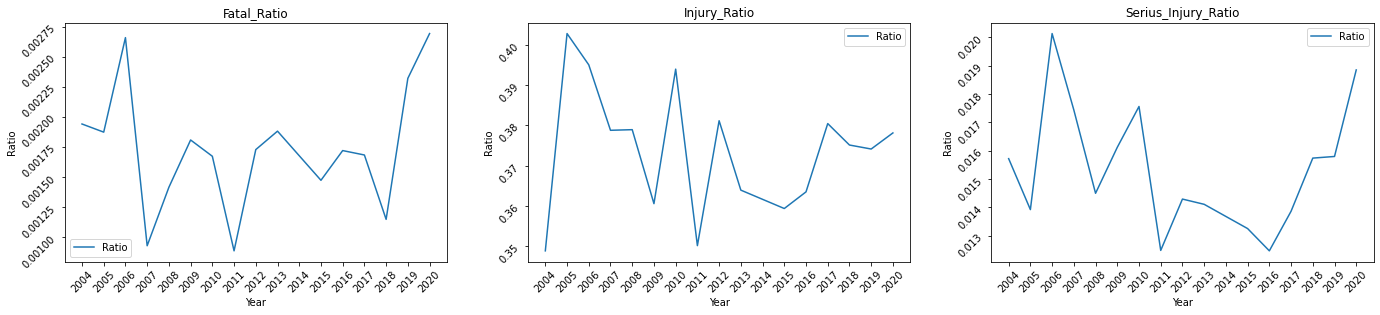

In [367]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df_col = pd.read_csv('C:/Project Data/Collisions.csv')

df_col_sum = df_col[["INCDATE","INJURIES","SERIOUSINJURIES","FATALITIES"]]
df_col_sum["Year"] = df_col_sum["INCDATE"].astype("datetime64[ns]").dt.year
df_col_sum["Accidents"] = 1
df_col_sum.drop(columns=["INCDATE"], inplace=True)
df_col_sum1 = df_col_sum.groupby(["Year"]).sum()
df_col_sum1["Injury Ratio"] = df_col_sum1["INJURIES"]/df_col_sum1["Accidents"]
df_col_sum1["Serious Injury Ratio"] = df_col_sum1["SERIOUSINJURIES"]/df_col_sum1["Accidents"]
df_col_sum1["Fatality Ratio"] = df_col_sum1["FATALITIES"]/df_col_sum1["Accidents"]
df_col_sum1.reset_index(inplace=True)
df_col_sum1.drop([0,11],inplace=True)
df_col_sum1.set_index(["Year"], inplace=True)

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,5))
fig.tight_layout(pad=5.0)
ax1.plot(df_col_sum1["Fatality Ratio"], label='Ratio')
ax1.set_xlabel('Year') 
ax1.set_ylabel('Ratio')
ax1.set_title("Fatal_Ratio")
ax1.legend()
ax1.tick_params(labelrotation=45)
ax1.xaxis.set_major_locator(plt.MaxNLocator(20))
ax2.plot(df_col_sum1["Injury Ratio"], label='Ratio')
ax2.set_xlabel('Year') 
ax2.set_ylabel('Ratio')
ax2.set_title("Injury_Ratio")
ax2.legend()
ax2.tick_params(labelrotation=45)
ax2.xaxis.set_major_locator(plt.MaxNLocator(20))
ax3.plot(df_col_sum1["Serious Injury Ratio"], label='Ratio')
ax3.set_xlabel('Year') 
ax3.set_ylabel('Ratio')
ax3.set_title("Serius_Injury_Ratio")
ax3.legend()
ax3.tick_params(labelrotation=45)
ax3.xaxis.set_major_locator(plt.MaxNLocator(20))

## 1.2 Problem
#### Data that can provide indication whether a Traffic accident, such data should include i.e. the weather condition during the accident, light condition, how the collision happened and so on. the goal of this analysis is to see whether there are prevailing conditions that lead to accident that involves bodily injury or worse, fatality.

## 1.3 Interest
#### Having identified the prevailing conditons that leads into severe accidents, both Insurance companies and community as a whole could then exercise policies to safe life and reducing the economic cost of insurance. Not only this will benefit Insurance industry but the community would benefit from having fatalities and improvement in wellfare.

# 2.0 Data Acquisition & Cleaning

### 2.1 Data Source
#### For this exercise, we will use Collision record from Seattle city GIS. The Documentation for the Data can be found [here](https://www.seattle.gov/Documents/Departments/SDOT/GIS/Collisions_OD.pdf) and the link to the Data Source Is [here](https://data-seattlecitygis.opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0/data?geometry=-122.326%2C47.592%2C-122.318%2C47.594)

### 2.2 Preliminary Data Cleansing
#### Upon Examination we have found out that the Data are good that all rows indicate single collision without duplicates.

In [265]:
print('Original Data Shape :', df_col.shape)
df_col1 = df_col.drop_duplicates()
print('Unique Data Shape :',df_col1.shape)

Original Data Shape : (221389, 40)
Unique Data Shape : (221389, 40)


#### Features that only have one level will be omitted since they won't contribute to the model. They are:

In [266]:
df_col_desc = pd.DataFrame(df_col.nunique(),columns=['Level'])
df_col_desc.sort_values(by=['Level']).head(4)

,Level
INATTENTIONIND,1
SPEEDING,1
PEDROWNOTGRNT,1
EXCEPTRSNDESC,1


#### Upon further Examination we found out there are 3 features that only have 2 levels however, one of them which is 'EXCEPTRSNCODE' is due to Not Enough Information. thus this collumn will be omitted from the Model

In [267]:
df_col_desc = pd.DataFrame(df_col.nunique(),columns=['Level'])
df_col_desc.sort_values(by=['Level']).iloc[4:7, 0:1]

,Level
EXCEPTRSNCODE,2
STATUS,2
HITPARKEDCAR,2


In [268]:
df_col_EXCEPTRSNCODE = pd.DataFrame(df_col.groupby(['EXCEPTRSNCODE'])['EXCEPTRSNCODE'].value_counts())
df_col_EXCEPTRSNCODE.head()

,,EXCEPTRSNCODE
EXCEPTRSNCODE,EXCEPTRSNCODE,
,,89207
NEI,NEI,11779


#### Features such as 'REPORTNO', 'INCKEY','OBJECTID', 'COLDETKEY' are ommited because they are the Unique record identifier which don't carry information on how/ when/ what collision.

In [269]:
df_col_desc = pd.DataFrame(df_col.nunique(),columns=['Level'])
df_col_desc.sort_values(by=['Level']).iloc[35:40, 0:1]

,Level
INCDTTM,169519
REPORTNO,221386
INCKEY,221389
OBJECTID,221389
COLDETKEY,221389


### 2.3 Feature Selection

#### After understanding the meaning of each feature, we opt to use 8 features as variable to severity code. They Are: 
- COLLISIONTYPE
- JUNCTIONTYPE
- SDOT_COLCODE
- UNDERINFL
- ROADCOND
- WEATHER
- LIGHTCOND
- HITPARKEDCAR

#### as for the label we will use
- SEVERITYCODE but trasnform to simplify the non Bodily injury code into SEVERITYCODE_1

#### Instead of the original feature, we will work with the numerical version of each feature as shown below.

In [368]:
# Re-mapping target labels
#df_col.drop(columns=['SEVERITYCODE_1'], inplace=True)
df_col['SEVERITYCODE_1']=df_col['SEVERITYCODE'].fillna('0').replace(['0','1','2','2b','3'],['0','0','1','2','3']).astype('float64')
#df_col.drop(columns=['SEVERITYDESC_1'], inplace=True)
df_col['SEVERITYDESC_1']=df_col['SEVERITYDESC'].fillna('Unknown').replace(['Unknown','Property Damage Only Collision','Injury Collision','Serious Injury Collision','Fatality Collision'],['Other','Other','Other','Serious Injury','Fatal'])

In [370]:
# Re-mapping categorical features
#df_col.drop(columns=['ADDRTYPE_1'], inplace=True)
df_col['ADDRTYPE_1'] = df_col_test1['ADDRTYPE'].fillna('Block').replace(['Alley','Block','Intersection'],['0','1','2']).astype('float64')

#df_col.drop(columns=['COLLISIONTYPE_1'], inplace=True)
df_col['COLLISIONTYPE_1'] = df_col['COLLISIONTYPE'].fillna('Other').replace(['Angles','Cycles','Head On','Left Turn','Other','Parked Car','Pedestrian','Rear Ended','Right Turn','Sideswipe'],['0','1','2','3','4','5','6','7','8','9']).astype('float64')

#df_col.drop(columns=['JUNCTIONTYPE_1'], inplace=True)
df_col['JUNCTIONTYPE_1'] = df_col['JUNCTIONTYPE'].fillna('Unknown').replace(['At Intersection (but not related to intersection)','At Intersection (intersection related)','Driveway Junction','Mid-Block (but intersection related)','Mid-Block (not related to intersection)','Ramp Junction','Unknown'],['0','1','2','3','4','5','6']).astype('float64')

#df_col.drop(columns=['SDOT_COLCODE_1'], inplace=True)
df_col['SDOT_COLCODE_1'] = df_col['SDOT_COLCODE'].fillna('0.0').astype('float64')

#df_col.drop(columns=['UNDERINFL_1'], inplace=True)
df_col['UNDERINFL_1'] = df_col_test1['UNDERINFL'].fillna('0').replace(['N','Y'],['0','1']).astype('float64')

#df_col.drop(columns=['ROADCOND_1'], inplace=True)
df_col['ROADCOND_1'] = df_col_test1['ROADCOND'].fillna('Unknown').replace(['Dry','Ice','Oil','Other','Sand/Mud/Dirt','Snow/Slush','Standing Water','Unknown','Wet'],['0','1','2','3','4','5','6','7','8']).astype('float64')

#df_col.drop(columns=['LIGHTCOND_1'], inplace=True)
df_col['LIGHTCOND_1'] = df_col_test1['LIGHTCOND'].fillna('Unknown').replace(['Dark - No Street Lights','Dark - Street Lights Off','Dark - Street Lights On','Dark - Unknown Lighting','Dawn','Daylight','Dusk','Other','Unknown'],['0','1','2','3','4','5','6','7','8']).astype('float64')

#df_col.drop(columns=['HITPARKEDCAR_1'], inplace=True)
df_col['HITPARKEDCAR_1'] = df_col_test1['HITPARKEDCAR'].fillna('N').replace(['N','Y'],['0','1']).astype('float64')

#df_col.drop(columns=['WEATHER_1'], inplace=True)
df_col['WEATHER_1'] = df_col_test1['WEATHER'].fillna('Unknown').replace(['Blowing Sand/Dirt','Blowing Snow','Clear','Fog/Smog/Smoke','Other','Overcast','Partly Cloudy','Raining','Severe Crosswind','Sleet/Hail/Freezing Rain','Snowing','Unknown'],['0','1','2','3','4','5','6','7','8','9','10','11']).astype('float64')

#### Pearson Correlation exercise indicates low correlation between 'SEVERITYCODE_1' and the features, however on heat map examination we also notice that the features are not significantly intercorrelated with each other which suggest that the features are not redudant.

In [379]:
#Correlation with label
cor_target = pd.DataFrame(abs(cor['SEVERITYCODE_1']))
cor_target.sort_values(by=['SEVERITYCODE_1'],ascending=False)

,SEVERITYCODE_1
SEVERITYCODE_1,1.000000
SDOT_COLCODE_1,0.243995
JUNCTIONTYPE_1,0.224267
WEATHER_1,0.205072
ADDRTYPE_1,0.199551
LIGHTCOND_1,0.167100
HITPARKEDCAR_1,0.122408
COLLISIONTYPE_1,0.111033
UNDERINFL_1,0.080007


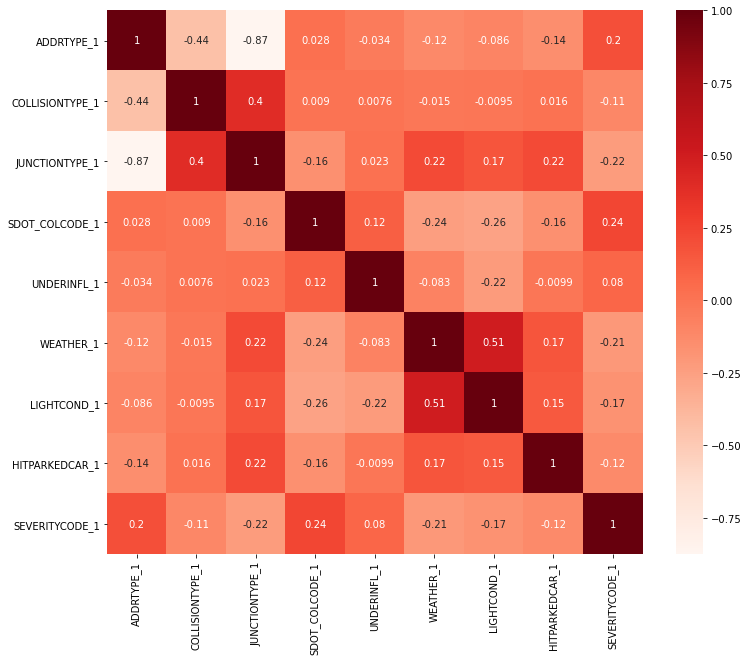

In [372]:
#Pearson Correlation
df_col_test = df_col[['ADDRTYPE_1','COLLISIONTYPE_1','JUNCTIONTYPE_1','SDOT_COLCODE_1','UNDERINFL_1','WEATHER_1','LIGHTCOND_1','HITPARKEDCAR_1','SEVERITYCODE_1']]
plt.figure(figsize=(12,10))
cor = df_col_test.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

#### Next we will examine each feature in more depths 